In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [12]:
df = df[df.Site_Name=='Caesarea']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [13]:
dfWithoutLastYearVisits = df.drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [14]:
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(433, 8)
(1372, 7)


In [15]:
def mlrModelResTrainTestCoeff(dataframe,shaffle=False):
    dataframe.dropna(inplace=True)
    dataframe.sort_values('Date')
    y = dataframe[['Date','Israelis_Count']]
    X = dataframe.drop('Israelis_Count',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=shaffle, test_size = 0.2, random_state=312148513)

    X_train_scaler = MinMaxScaler()
    X_test_scaler = MinMaxScaler()

    X_train_scaled = X_train_scaler.fit_transform(X_train.drop('Date',axis=1))
    X_test_scaled = X_test_scaler.fit_transform(X_test.drop('Date',axis=1))
    
    mlr = linear_model.LinearRegression()
    mlr.fit(X_train_scaled,y_train.Israelis_Count)
    
    prediction = mlr.predict(X_train_scaled)
    resTrain =  pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_train.Israelis_Count.values    },
        index=y_train.Date
    )
    
    prediction = mlr.predict(X_test_scaled)
    resTest = pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_test.Israelis_Count.values    },
        index=y_test.Date
    )
    coef = sorted( list(zip(np.round(mlr.coef_,5).T,X_train.drop("Date",axis=1).columns)))
    d = {}
    for tup in coef:
        d[tup[-1]] = tup[0]
    coefDF = pd.DataFrame.from_dict(d,orient='index')
    
    return resTrain,resTest,coefDF
    
def printRes(res ,plotLine=True ,plotResiduals = False):
    res = res.sort_index()
    print('rmse',function.get_rmse(res.Prediction, res.Actual))
    print('std',np.std(res.Actual))
    
    if plotResiduals:
        function.plot_residuals(actual=y_train.Israelis_Count,prediction=prediction)
    if plotLine:
        function.plot_line(actual=res.Actual,prediction=res.Prediction)
        
    print('Sample rows:')
    print( res.sample(10))

In [16]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfLastYearVisits)

C:\Users\Avivsa\AppData\Local\Temp\ipykernel_23380\1564167282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


                            0
pm10               -250.64010
IsVacation         -191.03262
last_year_visitors  210.81424
IsHoliday           447.92270
Temperature         756.18431
is_weekend          912.27766

rmse 632.3882882411009
std 780.967600162725


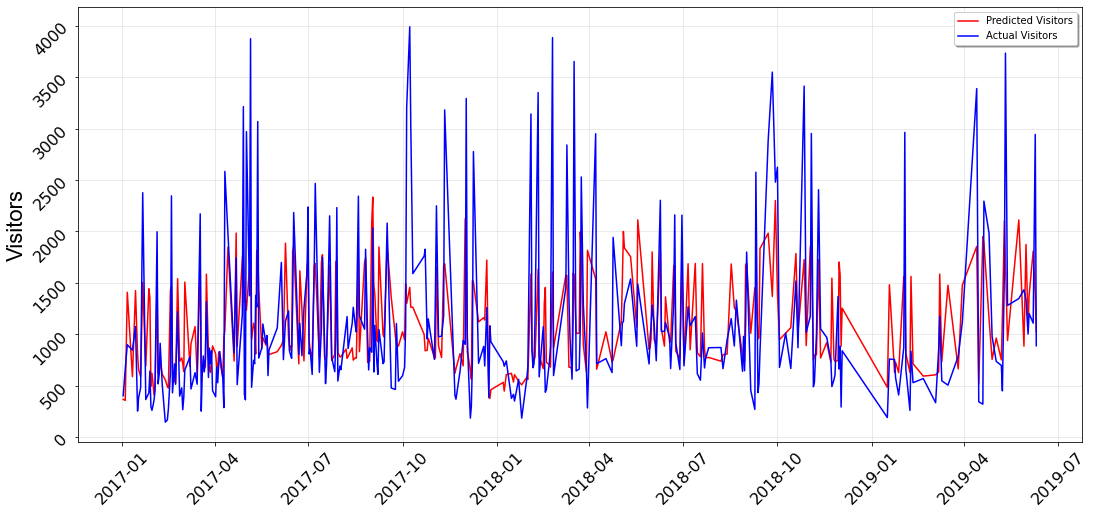

Sample rows:
             Prediction  Actual
Date                           
2017-05-07   951.461885     484
2017-12-06   644.112965     184
2018-01-25   508.183365     184
2017-12-25   374.513457    1082
2017-01-27  1442.615481     429
2017-07-18   757.657912     520
2019-05-11  1688.454650    3735
2018-06-30  1691.170509    2159
2019-02-01  1562.988313     873
2017-06-25  1246.332978     791

rmse 646.2629337908642
std 793.901068849987


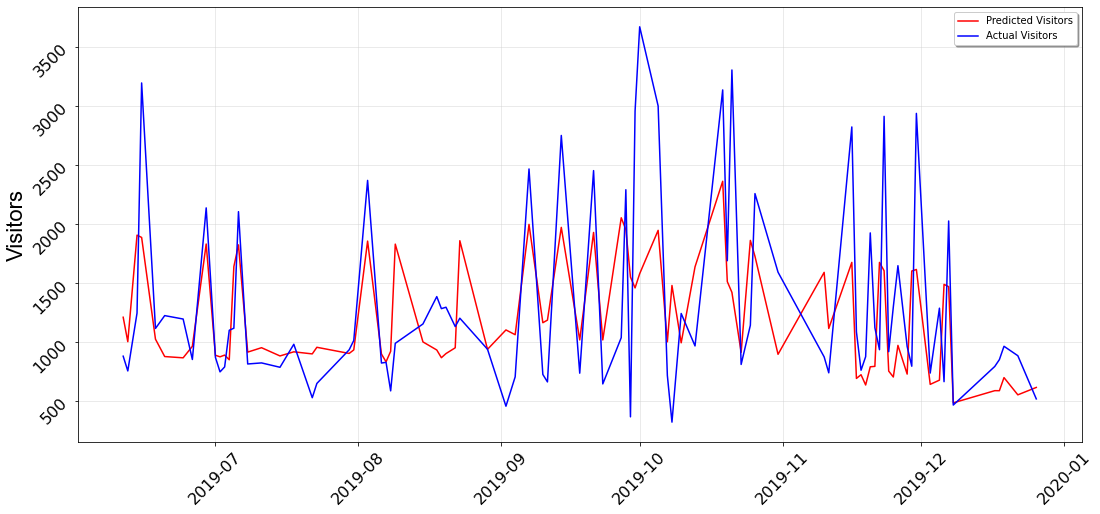

Sample rows:
             Prediction  Actual
Date                           
2019-10-21  1422.111282    3307
2019-11-17   692.578433    1087
2019-09-02  1103.555242     457
2019-10-10   994.440174    1243
2019-10-01  1580.269841    3673
2019-09-28  1954.021220    2292
2019-09-10  1164.724981     726
2019-07-23   956.462906     650
2019-12-22   553.403533     885
2019-11-20   791.107835    1926


In [17]:
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

In [18]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfEnGediWithoutLastYearVisits)
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

NameError: name 'dfEnGediWithoutLastYearVisits' is not defined